# Did my model overfit?

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Data Generation

In [74]:
Npts = 200
Ndim = 100
def make_data(Npts, Ndim):
    X = np.random.normal(0, 1, (Npts, Ndim))
    a0 = np.zeros(Ndim)
    a0[[13, 26, 71]] = np.random.uniform(-1, 1, 3)
    y0 = X @ a0
    y0 += 0.1*y0**2
    noise = np.random.normal(0, 1e-2, Npts)
    Y = y0 + noise
    return X, Y

X_train, Y_train = make_data(Npts, Ndim)

In [75]:
def compute_weight(X, Y):
    return np.linalg.lstsq(X, Y, rcond=None)[0]

In [76]:
a_train = compute_weight(X_train, Y_train)

In [77]:
np.mean((X_train @ a_train - Y_train)**2)

0.004552459051497817

In [78]:
X_test, Y_test = make_data(Npts, Ndim)

In [79]:
np.mean((X_test @ a_train - Y_test)**2)

1.818294692330531

# Problem Statement
* As a data scientist, you are given an eqution `Y = a @ X` and you need to solve for `a` given `X` and `Y`.  `X` is in the shape of 100 x 100 where the sample size and dimensions are both 100. `a0` is the ground-truth model weights for the given `X` and `Y`. `Y` is the result of `a0 * X`. The `compute_weight` function is given and with that you can compute weights `a` with `X` and `Y`.


## Problem 1
* The following plot shows when you solve for `a` how it's different from your ground truth `a0`. Explain the graph.

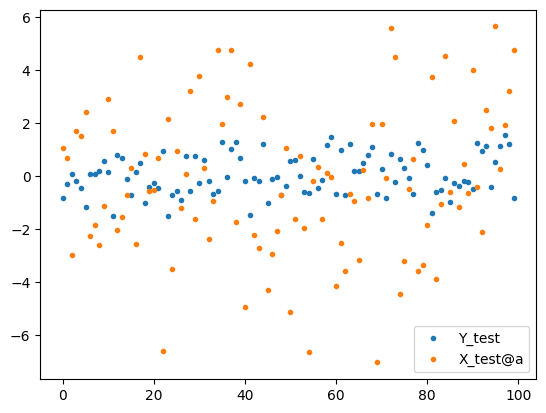

In [6]:
plt.plot(Y_test, ".", label='Y_test')
plt.plot(X_test @ a, ".", label='X_test@a')
plt.legend(loc=0)

## Answer to Problem 1
* `a` has overfit and it's quite different from the ground truth `a0`.

## Problem 2
* How will you validate your explanation of `Problem 1`? Predict your model `a`'s error rate on unseen test data.

In [12]:
shuffled = np.random.choice(np.arange(Npts), Npts, replace=False)

In [13]:
def compute_mse(a, X, Y):
    return np.mean((X@a - Y)**2)

In [92]:
def k_fold_cross_validation(X, Y, k=3):
    start = 0
    total = len(X)
    errors = []
    for i in range(k):
        val_X = X[start:start+(total//k)]
        train_X = np.concatenate([
            X[:start], X[start+(total//k):]
        ])
        val_Y = Y[start:start+(total//k)]
        train_Y = np.concatenate([
            Y[:start], Y[start+(total//k):]
        ])
        a = compute_weight(train_X, train_Y)
        error = compute_mse(a, val_X, val_Y)
        errors.append(error)
        start = start+(total//k)
        
    return np.array(errors)


[k_fold_cross_validation(X_train, Y_train, 3),
 compute_mse(a_train, X_test, Y_test)
]

[array([0.05530123, 0.04679666, 0.03539236]), 1.818294692330531]

In [41]:
import sklearn.linear_model

In [86]:
lr = sklearn.linear_model.LinearRegression(fit_intercept=False)

In [87]:
lr.fit(X_train, Y_train)

LinearRegression(fit_intercept=False)

In [88]:
lr.coef_ - a_train

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [82]:
import sklearn.model_selection

In [89]:
ycv = sklearn.model_selection.cross_val_predict(lr, X_train, Y_train)

In [90]:
np.mean((ycv - Y_train)**2)

0.02322043021620387

In [35]:
a80 = compute_weight(X_train[:160], Y_train[:160])

In [37]:
compute_mse(a80, X_train[:160], Y_train[:160])

0.019949144972218745

In [40]:
compute_mse(a80, X_train[160:], Y_train[160:])

0.1522367512439903

* K-fold cross validation is **a resampling procedure used to evaluate machine learning models on a limited data sample.**
<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png"  width="500" height="600">

# References
* https://scikit-learn.org/stable/_images/grid_search_cross_validation.png
* https://machinelearningmastery.com/k-fold-cross-validation/